In [1]:
import sys
v = sys.version_info
print(f"We are using Python {v.major}.{v.minor}.{v.micro}")

We are using Python 3.10.6


In [2]:
!grass -c -e ~/Documents/grassdata/nc_spm_08_grass7/5A_ASCII

Creating new GRASS GIS mapset <5A_ASCII>...


In [3]:
# Import Python standard library and IPython packages we need.
import subprocess
import sys
import matplotlib.pyplot as plt
from PIL import Image


# Ask GRASS GIS where its Python packages are.
sys.path.append(
    subprocess.check_output(["grass", "--config", "python_path"], text=True).strip()
)

# Import the GRASS GIS packages we need.
import grass.script as gs
import grass.jupyter as gj

# Start GRASS Session
session = gj.init("~/Documents/grassdata", "nc_spm_08_grass7", "5A_ASCII")


In [4]:
!wget http://ncsu-geoforall-lab.github.io/geospatial-modeling-course/grass/data/lid_be_pts.txt -O ./inputs/lid_be_pts.txt

--2022-11-20 21:27:56--  http://ncsu-geoforall-lab.github.io/geospatial-modeling-course/grass/data/lid_be_pts.txt
Resolving ncsu-geoforall-lab.github.io (ncsu-geoforall-lab.github.io)... 2606:50c0:8003::153, 2606:50c0:8002::153, 2606:50c0:8000::153, ...
Connecting to ncsu-geoforall-lab.github.io (ncsu-geoforall-lab.github.io)|2606:50c0:8003::153|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9542830 (9.1M) [text/plain]
Saving to: ‘./inputs/lid_be_pts.txt’

./inputs/lid_be_pts 100%[===================>]   9.10M  3.44MB/s    in 2.6s    

2022-11-20 21:27:59 (3.44 MB/s) - ‘./inputs/lid_be_pts.txt’ saved [9542830/9542830]



In [5]:
!wget http://ncsu-geoforall-lab.github.io/geospatial-modeling-course/grass/data/lid_mr_pts.txt -O ./inputs/lid_mr_pts.txt

--2022-11-20 21:28:32--  http://ncsu-geoforall-lab.github.io/geospatial-modeling-course/grass/data/lid_mr_pts.txt
Resolving ncsu-geoforall-lab.github.io (ncsu-geoforall-lab.github.io)... 2606:50c0:8002::153, 2606:50c0:8001::153, 2606:50c0:8000::153, ...
Connecting to ncsu-geoforall-lab.github.io (ncsu-geoforall-lab.github.io)|2606:50c0:8002::153|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1934718 (1.8M) [text/plain]
Saving to: ‘./inputs/lid_mr_pts.txt’

./inputs/lid_mr_pts 100%[===================>]   1.84M  11.8MB/s    in 0.2s    

2022-11-20 21:28:32 (11.8 MB/s) - ‘./inputs/lid_mr_pts.txt’ saved [1934718/1934718]



In [6]:
%%bash
g.region rural_1m res=2 -p
r.in.xyz input=./inputs/lid_be_pts.txt output=lid_be_binn2m method=n
r.in.xyz input=./inputs/lid_mr_pts.txt output=lid_mr_binn2m method=n

projection: 99 (Lambert Conformal Conic)
zone:       0
datum:      nad83
ellipsoid:  a=6378137 es=0.006694380022900787
north:      220750
south:      220000
west:       638300
east:       639000
nsres:      2
ewres:      2
rows:       375
cols:       350
cells:      131250


Reading input data...
  31  62  94 100
319214 points found in input file
Writing to output raster map...
   0   6  12  18  24  30  36  42  48  54  60  66  72  78  84  90  96 100
r.in.xyz complete. 23162 points found in region.
Reading input data...
 100
36944 points found in input file
Writing to output raster map...
   0   6  12  18  24  30  36  42  48  54  60  66  72  78  84  90  96 100
r.in.xyz complete. 27281 points found in region.


In [7]:
%%bash
r.report lid_mr_binn2m unit=p
r.univar lid_mr_binn2m

   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100


+-----------------------------------------------------------------------------+
|                         RASTER MAP CATEGORY REPORT                          |
|LOCATION: nc_spm_08_grass7                           Sun Nov 20 21:31:48 2022|
|-----------------------------------------------------------------------------|
|          north: 220750    east: 639000                                      |
|REGION    south: 220000    west: 638300                                      |
|          res:        2    res:       2                                      |
|-----------------------------------------------------------------------------|
|MASK: none                                                                   |
|-----------------------------------------------------------------------------|
|MAP: Raw x,y,z data binned into a raster grid by cell n (lid_mr_binn2m in 5A_|
|-----------------------------------------------------------------------------|
|                        Category Inform

   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100


total null and non-null cells: 131250
total null cells: 0

Of the non-null cells:
----------------------
n: 131250
minimum: 0
maximum: 3
range: 3
mean: 0.207855
mean of absolute values: 0.207855
standard deviation: 0.423433
variance: 0.179295
variation coefficient: 203.715 %
sum: 27281


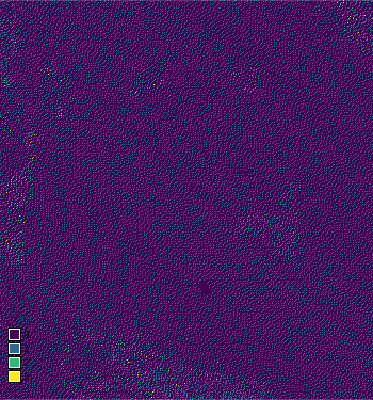

In [8]:
# Create Map instance
lid_mr_binn2m_map = gj.Map(filename="output/mylidmrn2m.png")
lid_mr_binn2m_map.d_rast(map="lid_mr_binn2m")
lid_mr_binn2m_map.d_legend(raster="lid_mr_binn2m", at=[2,20,2,5])

# Display map
lid_mr_binn2m_map.show()

In [9]:
%%bash
r.report lid_be_binn2m unit=p
r.univar lid_be_binn2m

   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100


+-----------------------------------------------------------------------------+
|                         RASTER MAP CATEGORY REPORT                          |
|LOCATION: nc_spm_08_grass7                           Sun Nov 20 21:32:28 2022|
|-----------------------------------------------------------------------------|
|          north: 220750    east: 639000                                      |
|REGION    south: 220000    west: 638300                                      |
|          res:        2    res:       2                                      |
|-----------------------------------------------------------------------------|
|MASK: none                                                                   |
|-----------------------------------------------------------------------------|
|MAP: Raw x,y,z data binned into a raster grid by cell n (lid_be_binn2m in 5A_|
|-----------------------------------------------------------------------------|
|                        Category Inform

   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100


total null and non-null cells: 131250
total null cells: 0

Of the non-null cells:
----------------------
n: 131250
minimum: 0
maximum: 2
range: 2
mean: 0.176472
mean of absolute values: 0.176472
standard deviation: 0.381361
variance: 0.145437
variation coefficient: 216.103 %
sum: 23162


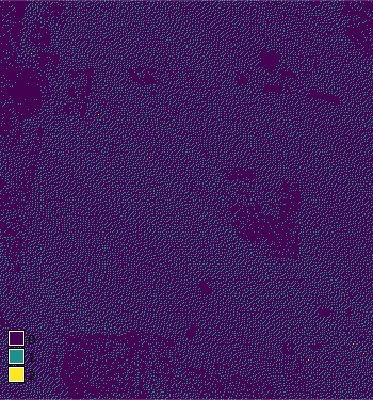

In [10]:
# Create Map instance
lid_be_binn2m_map = gj.Map(filename="output/lid_be_binn2m.png")
lid_be_binn2m_map.d_rast(map="lid_be_binn2m")
lid_be_binn2m_map.d_legend(raster="lid_be_binn2m", at=[2,20,2,5])

# Display map
lid_be_binn2m_map.show()

In [11]:
%%bash
v.patch P079214,P079215,P079218,P079219 out=planimetry_rural

Patching vector map <P079214>...
Patching vector map <P079215>...
Patching vector map <P079218>...
Patching vector map <P079219>...
Building topology for vector map <planimetry_rural@5A_ASCII>...
Registering primitives...
Building topology for vector map <planimetry_rural@5A_ASCII>...
Registering primitives...
Intersections at borders will have to be snapped
Lines common between files will have to be edited
The header information also may have to be edited
v.patch complete. 4 vector maps patched


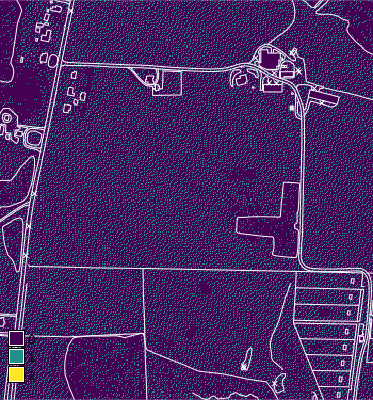

In [16]:
# Create Map instance
mylidben2m_map = gj.Map(filename="output/mylidben2m.png")
mylidben2m_map.d_rast(map="lid_be_binn2m")
mylidben2m_map.d_vect(map="planimetry_rural", color="white")

mylidben2m_map.d_legend(raster="lid_be_binn2m", at=[2,20,2,5])
mylidben2m_map.show()

In [18]:
%%bash
g.region rural_1m res=6 -ap
r.in.xyz input=inputs/lid_be_pts.txt out=lid_be_binn6m meth=n

projection: 99 (Lambert Conformal Conic)
zone:       0
datum:      nad83
ellipsoid:  a=6378137 es=0.006694380022900787
north:      220752
south:      219996
west:       638298
east:       639000
nsres:      6
ewres:      6
rows:       126
cols:       117
cells:      14742


Reading input data...
  31  62  94 100
319214 points found in input file
Writing to output raster map...
   0   6  12  18  24  30  36  42  48  54  60  66  72  78  84  90  96 100
r.in.xyz complete. 23363 points found in region.


In [20]:
%%bash
r.report lid_be_binn6m unit=p
r.univar lid_be_binn6m

   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100


+-----------------------------------------------------------------------------+
|                         RASTER MAP CATEGORY REPORT                          |
|LOCATION: nc_spm_08_grass7                           Sun Nov 20 21:38:21 2022|
|-----------------------------------------------------------------------------|
|          north: 220752    east: 639000                                      |
|REGION    south: 219996    west: 638298                                      |
|          res:        6    res:       6                                      |
|-----------------------------------------------------------------------------|
|MASK: none                                                                   |
|-----------------------------------------------------------------------------|
|MAP: Raw x,y,z data binned into a raster grid by cell n (lid_be_binn6m in 5A_|
|-----------------------------------------------------------------------------|
|                        Category Inform

   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100


total null and non-null cells: 14742
total null cells: 0

Of the non-null cells:
----------------------
n: 14742
minimum: 0
maximum: 4
range: 4
mean: 1.58479
mean of absolute values: 1.58479
standard deviation: 0.786085
variance: 0.617929
variation coefficient: 49.6018 %
sum: 23363


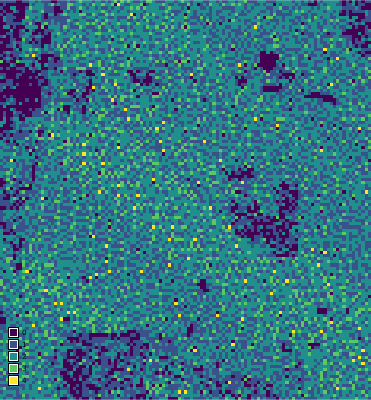

In [19]:
# Create Map instance
mylidben6m_map = gj.Map(filename="output/mylidben6m.png")
mylidben6m_map.d_rast(map="lid_be_binn6m")
mylidben6m_map.d_legend(raster="lid_be_binn6m", at=[2,20,2,5])

# Display map
mylidben6m_map.show()

In [21]:
%%bash
r.in.xyz input=inputs/lid_be_pts.txt out=lid_be_binmean6m meth=mean
r.colors lid_be_binmean6m color=elevation

Reading input data...
  31  62  94 100
319214 points found in input file
Writing to output raster map...
   0   6  12  18  24  30  36  42  48  54  60  66  72  78  84  90  96 100
r.in.xyz complete. 23363 points found in region.
Color table for raster map <lid_be_binmean6m> set to 'elevation'


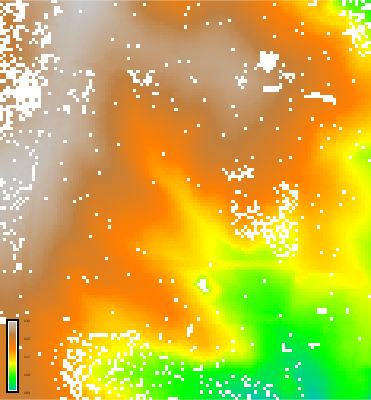

In [22]:
# Create Map instance
lid_be_binmean6m_map = gj.Map(filename="output/lid_be_binmean6m.png")
lid_be_binmean6m_map.d_rast(map="lid_be_binmean6m")
lid_be_binmean6m_map.d_legend(raster="lid_be_binmean6m", at=[2,20,2,5])

# Display map
lid_be_binmean6m_map.show()

In [24]:
%%bash
r.in.xyz input=inputs/lid_mr_pts.txt out=lid_mr_binmean6m meth=mean
r.colors lid_mr_binmean6m co=elevation

Reading input data...
 100
36944 points found in input file
Writing to output raster map...
   0   6  12  18  24  30  36  42  48  54  60  66  72  78  84  90  96 100
r.in.xyz complete. 27621 points found in region.
Color table for raster map <lid_mr_binmean6m> set to 'elevation'


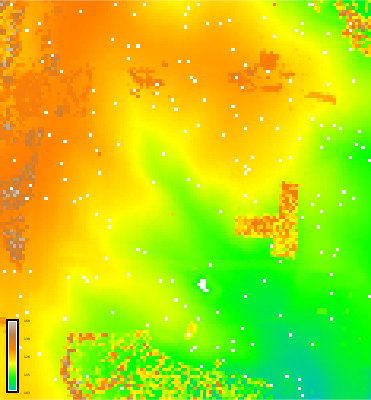

In [25]:
# Create Map instance
mylidmrmean6m_map = gj.Map(filename="output/mylidmrmean6m.png")
mylidmrmean6m_map.d_rast(map="lid_mr_binmean6m")
mylidmrmean6m_map.d_legend(raster="lid_mr_binmean6m", at=[2,20,2,5])

# Display map
mylidmrmean6m_map.show()

In [26]:
%%bash
r.in.xyz input=inputs/lid_be_pts.txt out=lid_be_binrange6m meth=range
r.in.xyz input=inputs/lid_mr_pts.txt out=lid_mr_binrange6m meth=range

Reading input data...
  31  62  94 100
319214 points found in input file
Writing to output raster map...
   0   6  12  18  24  30  36  42  48  54  60  66  72  78  84  90  96 100
r.in.xyz complete. 23363 points found in region.
Reading input data...
 100
36944 points found in input file
Writing to output raster map...
   0   6  12  18  24  30  36  42  48  54  60  66  72  78  84  90  96 100
r.in.xyz complete. 27621 points found in region.


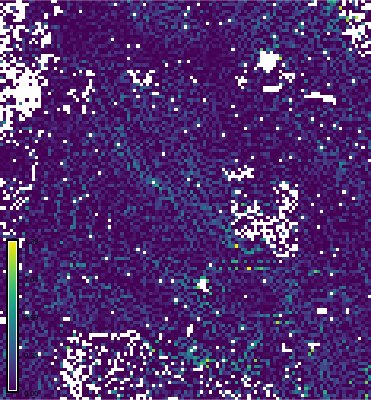

In [27]:
# Create Map instance
lid_be_binrange6m_map = gj.Map(filename="output/lid_be_binrange6m.png")
lid_be_binrange6m_map.d_rast(map="lid_be_binrange6m")
lid_be_binrange6m_map.d_legend(raster="lid_be_binrange6m", at=[2,40,2,5])

# Display map
lid_be_binrange6m_map.show()

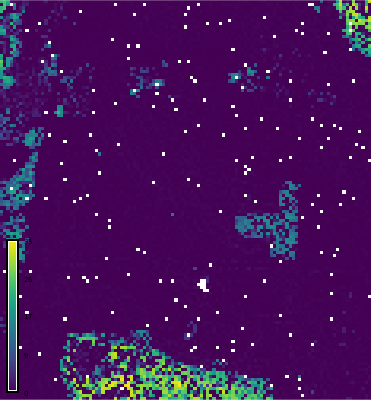

In [28]:
# Create Map instance
lid_mr_binrange6m_map = gj.Map(filename="output/lid_mr_binrange6m.png")
lid_mr_binrange6m_map.d_rast(map="lid_mr_binrange6m")
lid_mr_binrange6m_map.d_legend(raster="lid_mr_binrange6m", at=[2,40,2,5])

# Display map
lid_mr_binrange6m_map.show()

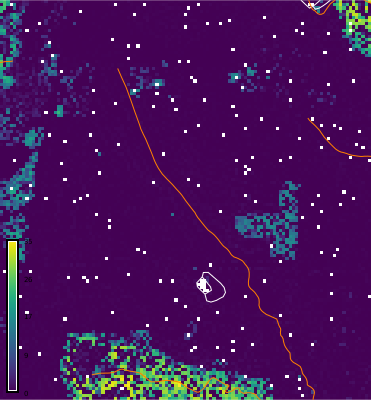

In [32]:
# Create Map instance
mylidmrrange6m_map = gj.Map(filename="output/mylidmrrange6m.png")
mylidmrrange6m_map.d_rast(map="lid_mr_binrange6m")
mylidmrrange6m_map.d_vect(map="lakes", type="boundary", co="white")
mylidmrrange6m_map.d_vect(map="streams", co="orange")

mylidmrrange6m_map.d_legend(raster="lid_mr_binrange6m", at=[2,40,2,5])

# Display map
mylidmrrange6m_map.show()

In [33]:
!g.region rural_1m -p

projection: 99 (Lambert Conformal Conic)
zone:       0
datum:      nad83
ellipsoid:  a=6378137 es=0.006694380022900787
north:      220750
south:      220000
west:       638300
east:       639000
nsres:      1
ewres:      1
rows:       750
cols:       700
cells:      525000


In [41]:
def quick_map(map_name, save_name=None, at=[2,40,2,5], val=None):
    save_name = save_name if save_name else map_name
    qmap = gj.Map(filename=f"output/{save_name}.png")
    qmap.d_rast(map=map_name, val=val)
    qmap.d_legend(raster=map_name, at=at)
    return qmap.show()


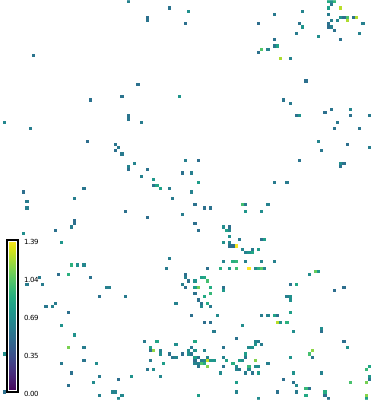

In [44]:
quick_map("lid_be_binrange6m", val="0.5-20.")

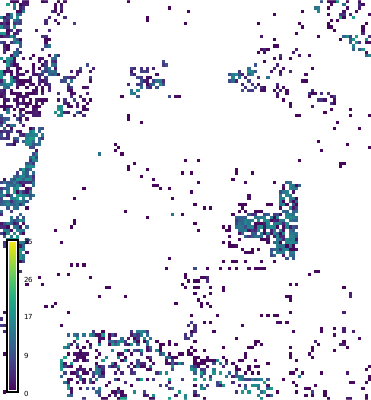

In [43]:
# d.rast ortho_2001_t792_1m
# d.rast lid_mr_binrange6m val=0.5-20.

quick_map("lid_mr_binrange6m", val="0.5-20.")

In [45]:
%%bash
g.region rural_1m -p
v.in.ascii -ztr input=inputs/lid_be_pts.txt out=elev_lid_bepts z=3

projection: 99 (Lambert Conformal Conic)
zone:       0
datum:      nad83
ellipsoid:  a=6378137 es=0.006694380022900787
north:      220750
south:      220000
west:       638300
east:       639000
nsres:      1
ewres:      1
rows:       750
cols:       700
cells:      525000


Scanning input for column types...
Skipping 296052 of 319214 rows falling outside of current region
Number of columns: 3
Number of data rows: 319214
Importing points...
   0   3   6 100
Building topology for vector map <elev_lid_bepts@5A_ASCII>...
Registering primitives...


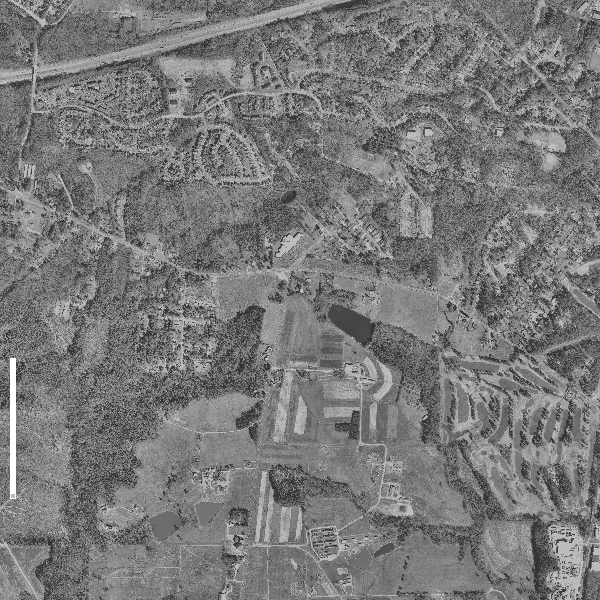

In [46]:
quick_map("ortho_2001_t792_1m")